## **Reinforcement Learning Model for Budget Allocation**

In [1]:

# Installing and importing all the necessary libraries for our MMM framework
!pip install stable-baselines3
!pip install torch torchvision torchaudio
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install shimmy
!pip install stable-baselines3
!pip install gymnasium


from stable_baselines3 import PPO

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import gym
from gym import spaces

from sklearn.preprocessing import MinMaxScaler

import torch

from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.3/954.3 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.1
    Uninstalling gymnasium-0.29.1:
      Successfully uninstalled gymnasium-0.29.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.3.2 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0a2 which is incompatible.
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0a2
    Uninstalling gymnasium-1.0.0a2:
      Successfully uninstalled gymnasium-1.0.0a2
ERROR: pip's

In [3]:
# Loading the updated dataset we created
df = pd.read_csv('/content/updated_mmm_data.csv', parse_dates=['Date'])

In [4]:

df

,Date,Revenue,Demand (No. of Handsets),Sales (No. of Handsets),SMS,Newspaper ads,Radio,TV,PPC,Offline,...,Contests_ROI,Coupons_ROI,Internet_ROI,Email_ROI,Facebook Post_ROI,Facebook ads_ROI,Sponsorship_ROI,Newsletter article_ROI,Direct mail_ROI,Total_Marketing_Spend
0,2010-01-01,1533299.16,4384,4240,77.4819,14.104193,112.3370,1479.4565,95.3330,11.8398,...,0.002719,0.004157,0.161389,0.031215,0.073091,0.286295,0.039773,0.014602,0.006241,3924.264133
1,2010-01-02,1681816.96,4366,4266,73.4783,13.298758,105.7133,1369.8913,114.9570,27.8039,...,0.001324,0.004143,0.145616,0.034863,0.069972,0.295594,0.041552,0.068674,0.014318,4320.980228
2,2010-01-03,1353028.79,4006,4206,80.6093,13.200691,108.7702,1428.0645,113.0900,0.0000,...,0.001815,0.003350,0.151490,0.033700,0.077626,0.295391,0.041254,0.010784,0.003273,3780.110141
3,2010-01-04,1488860.84,4076,4176,65.9319,12.721429,93.3065,1309.3548,72.4420,0.0000,...,0.002907,0.002219,0.150618,0.036659,0.087818,0.307413,0.046196,0.015986,0.003748,3620.207699
4,2010-01-05,1633299.16,4834,5234,77.4819,14.104193,112.3370,1479.4565,95.3330,11.8398,...,0.002719,0.004157,0.161389,0.031215,0.073091,0.286295,0.039773,0.014602,0.006241,3924.264133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,2016-01-16,7312018.52,105031,6456,38.9348,10.688346,79.3506,1090.9399,42.8481,36.3533,...,0.000068,0.000920,0.492655,0.023365,0.051749,0.211249,0.035239,0.011372,0.002572,7593.644706
2207,2016-01-17,9734288.64,189110,5453,41.5698,10.810839,78.3685,1107.2965,78.5261,15.0240,...,0.000097,0.001320,0.376608,0.030339,0.058925,0.274302,0.040125,0.011518,0.003340,5493.761889
2208,2016-01-18,8699431.32,123374,5134,42.8271,11.439653,77.9089,1161.9393,132.1241,15.1587,...,0.000078,0.001062,0.370704,0.035777,0.049903,0.323475,0.033982,0.011366,0.003939,6326.281453
2209,2016-01-19,7680844.15,116071,4279,37.9167,11.885714,62.9688,1251.2500,85.0218,20.9779,...,0.000080,0.001083,0.356131,0.036176,0.059524,0.327079,0.040533,0.014579,0.003983,6659.386414


In [5]:
# Setting a random seed for reproducibility across different libraries

# Seed value is used to ensure that random processes in the model are consistent each time the code runs.
# This helps in making the results reproducible and ensures that every run with the same data and seed will produce the same outcomes.

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

In [6]:
# Ensuring that 'Date' column is in the correct datetime format
# This step is important for extracting time-based features like day, month, and year.
df['Date'] = pd.to_datetime(df['Date'])

# Extracting specific time-related features from the 'Date' column
# 'Day', 'Month', and 'Year' are common features used in time series and seasonality analysis.
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Function to calculate 'Season' based on the month of the year
# Seasons are categorized as Winter (Dec-Feb), Spring (Mar-May), Summer (Jun-Aug), and Fall (Sep-Nov)
def get_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

# Applying the season calculation function to the 'Month' column
df['Season'] = df['Month'].apply(get_season)

# Calculating the day of the week (0=Monday, 6=Sunday)
# Useful for identifying weekly patterns in the data, as marketing effectiveness may vary across days.
df['Day_of_Week'] = df['Date'].dt.dayofweek

# List of marketing channels used in the dataset
# These channels will serve as the key features for analyzing how marketing spend affects revenue.
CHANNELS = [
    'SMS', 'Newspaper ads', 'Radio', 'TV', 'PPC',
    'Offline', 'Contests', 'Coupons', 'Internet',
    'Email', 'Facebook Post', 'Facebook ads',
    'Sponsorship', 'Newsletter article', 'Direct mail'
]

# Defining the features to be normalized
# Normalizing time-based features and external factors like temperature and holidays for better model performance.
feature_columns = ['Day', 'Month', 'Year', 'Temperature', 'Is_Holiday', 'Season', 'Day_of_Week']

# Normalizing the features to a range between 0 and 1 using MinMaxScaler
# Normalization ensures that all features have the same scale, which improves the performance of machine learning algorithms.
scaler = MinMaxScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])



In [7]:
# Class definition for the custom reinforcement learning environment (MarketingEnv)

# This class simulates a marketing environment where an RL agent can allocate a budget across marketing channels.


class MarketingEnv(gym.Env):
    """
    Custom Environment for Marketing Budget Allocation.
    """
    metadata = {'render.modes': ['human']}

    def __init__(self, data):
        super(MarketingEnv, self).__init__()
 # Initializing the environment with data and set up the initial step and total steps.
        self.data = data.reset_index(drop=True)
        self.current_step = 0
        self.total_steps = len(self.data)

       # Defining which features to use (e.g., day, month, season, etc.)
        self.feature_columns = ['Day', 'Month', 'Year', 'Temperature', 'Is_Holiday', 'Season', 'Day_of_Week']
        self.feature_indices = {feature: idx for idx, feature in enumerate(self.feature_columns)}

        # Defining action and observation space for the agent.
        # Action space: How much budget to allocate to each marketing channel (between 0 and 1).
        # Observation space: The features like day, season, etc., normalized between 0 and 1.
        self.action_space = spaces.Box(low=0, high=1, shape=(len(CHANNELS),), dtype=np.float32)
        self.observation_space = spaces.Box(low=0, high=1, shape=(len(self.feature_columns),), dtype=np.float32)

        self.state = None
        self.done = False
        self.total_budget = 1  # Assuming normalized budget for ease in calculations

    # Reset the environment to its initial state (starting from step 0)
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = 0
        self.done = False
        self.state = self._get_observation()
        info = {}
        return self.state, info

    def _get_observation(self):
        obs = self.data.loc[self.current_step, self.feature_columns].values.astype(np.float32)
        return obs

    def step(self, action):
        # Converting action tensor to NumPy array
        if isinstance(action, torch.Tensor):
            action = action.cpu().detach().numpy()
        else:
            action = np.array(action)

        # Ensure action sums to 1
        action = np.clip(action, 0, 1)
        action_sum = np.sum(action)
        if action_sum > 0:
            action = action / action_sum
        else:
            action = np.ones_like(action) / len(action)

        # Calculate revenue based on the action taken (budget allocation).
        revenue = self._calculate_revenue(action)

        # Reward is the revenue (you can adjust the exponent if needed)
        reward = np.power(revenue, 2)

        # Determine if episode is terminated
        self.current_step += 1
        terminated = False
        truncated = False

        if self.current_step >= self.total_steps:
            terminated = True
            self.state, _ = self.reset()
        else:
            self.state = self._get_observation()

        info = {}
        return self.state, reward, terminated, truncated, info
    # Function to calculate revenue based on the action taken (budget allocation)
    def _calculate_revenue(self, action):

        action = np.array(action)

        # Extracting state features
        is_holiday = float(self.state[self.feature_indices['Is_Holiday']])
        temperature = float(self.state[self.feature_indices['Temperature']])
        month = float(self.state[self.feature_indices['Month']])
        season = float(self.state[self.feature_indices['Season']])
        day_of_week = float(self.state[self.feature_indices['Day_of_Week']])
        day = float(self.state[self.feature_indices['Day']])
        year = float(self.state[self.feature_indices['Year']])

        #  Denormalize features like month and day for calculations (since they are normalized between 0 and 1).
        month_denorm = month * 11 + 1  # Denormalize 'Month' from [0,1] to [1,12]
        day_of_week_denorm = day_of_week * 6  # Denormalize 'Day_of_Week' from [0,1] to [0,6]
        day_denorm = day * 30 + 1  # Denormalize 'Day' from [0,1] to [1,31]

        # Simulated base ROI coefficients for each channel
        base_roi = np.array([
            1.5,  # SMS
            1.2,  # Newspaper ads
            1.3,  # Radio
            1.8,  # TV
            2.0,  # PPC
            1.1,  # Offline
            1.4,  # Contests
            1.6,  # Coupons
            1.7,  # Internet
            1.3,  # Email
            1.2,  # Facebook Post
            1.9,  # Facebook ads
            1.5,  # Sponsorship
            1.4,  # Newsletter article
            1.3   # Direct mail
        ], dtype=np.float32)

        # Adjust ROI based on the state (season, holiday, etc.)
        season_adjustment = 1 + 0.5 * season  # Season normalized between 0 and 1

        day_adjustment = 1 + 0.2 * (day_of_week_denorm / 6)  # Scale day_of_week to [0,1]

        holiday_adjustment = 1 + 1.0 * is_holiday  # Is_Holiday is 0 or 1

        temperature_adjustment = 1 + 0.5 * (temperature - 0.5)  # Adjust as needed

        month_adjustment = 1 + 0.5 * np.cos(2 * np.pi * (month_denorm - 1) / 12)  # Adjust as needed

        # Effective ROI (base ROI adjusted by the state features)
        effective_roi = base_roi * season_adjustment * day_adjustment * holiday_adjustment * temperature_adjustment * month_adjustment

        # Calculate revenue as the sum of allocated budget multiplied by the adjusted ROI for each channel.
        allocated_budget = action * self.total_budget
        revenue = np.sum(allocated_budget * effective_roi)

        return revenue

    def render(self, mode='human'):
        pass

    def close(self):
        pass




In [8]:
# Instantiate the environment
env = MarketingEnv(df)

In [9]:
# Creating the PPO model with parameters (being updated)
# Proximal Policy Optimization (PPO) is a type of reinforcement learning algorithm.
# It is designed to balance exploration (trying new actions) and exploitation (using known actions for rewards).

model = PPO(
    'MlpPolicy',  # This defines the policy type. 'MlpPolicy' is a multi-layer perceptron policy used for decision making.
    env,  # This is the environment we defined earlier where the agent interacts (MarketingEnv).
    verbose=1,  # Verbose level for logging. Setting this to 1 allows us to see detailed logs during training.

    # Learning rate controls how quickly the model adapts to new data.
    learning_rate=3e-4,  # 0.0003 is a typical learning rate used in PPO models.

    # Batch size refers to the number of samples used to update the model.
    batch_size=64,  # We are using a batch size of 64 to maintain stability in training.

    # Number of steps before updating the policy.
    n_steps=2048,  # 2048 steps are taken in the environment before the policy update happens.

    # Gamma is the discount factor for future rewards. It tells the model how much to care about future rewards.
    gamma=0.98,  # Gamma is set to 0.98, meaning the model prioritizes immediate rewards slightly more than future rewards.

    # GAE lambda is used for Generalized Advantage Estimation, which reduces variance in policy updates.
    gae_lambda=0.9,  # A lambda of 0.9 balances immediate and long-term rewards.

    # Clip range defines how much the policy can change during each update to ensure stable learning.
    clip_range=0.2,  # A clip range of 0.2 restricts how much the policy can change in one update.

    # Entropy coefficient encourages exploration by adding randomness to actions.
    ent_coef=0.005,  # This small entropy value encourages some exploration while ensuring the model converges on good policies.

    # policy_kwargs is used to define the architecture of the policy network (which determines actions).
    policy_kwargs=dict(
        net_arch=dict(
            pi=[512, 256, 128],  # Policy network architecture (pi) with 3 layers of 512, 256, and 128 neurons.
            vf=[512, 256, 128]   # Value function network (vf) has the same architecture as the policy network.
        )
    ),

    seed=seed,  # A random seed is used to ensure reproducibility in training results.
)

# Total timesteps represent how long the model will train.
total_timesteps = 50000  # 50,000 steps are used for initial training, but this can be increased for more thorough learning.

# Train the model
# This command starts the learning process, where the model interacts with the environment and learns to allocate budgets.
model.learn(total_timesteps=total_timesteps)



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 573  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.21e+03    |
|    ep_rew_mean          | 1.31e+04    |
| time/                   |             |
|    fps                  | 369         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009608639 |
|    clip_fraction        | 0.0966      |
|    clip_range           | 0.2         |
|    entropy_loss         | -21.3       |
|    explained_variance   | 0.00121     |
|    learning_rate        | 0.0003      |
|    loss                 | 1.12e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.015

4.1. **Hyperparameter Search Space**

learning_rate: Sampled logarithmically between 1e-5 and 1e-3. This range allows for fine-tuning from very small to moderate learning rates.

batch_size: Chosen from [64, 128, 256]. Larger batch sizes can stabilize training but require more computational resources.

n_steps: Sampled from [1024, 2048, 4096]. This controls the number of steps to collect before performing an update.

gamma: Sampled uniformly between 0.95 and 0.9999. This adjusts the discount factor for future rewards.

gae_lambda: Sampled uniformly between 0.8 and 1.0. Balances bias and variance in advantage estimation.

clip_range: Sampled uniformly between 0.1 and 0.3. Controls the clipping in PPO's objective function.

ent_coef: Sampled logarithmically between 1e-4 and 1e-2. Higher values encourage exploration.

net_arch: Chosen from predefined architectures to explore different network complexities.

In [11]:
import time  # Importing the time module to track training duration

# Importing necessary components from Stable Baselines3
from stable_baselines3.common.callbacks import BaseCallback

# Custom Callback Class to Log Rewards
# This callback will store the total reward obtained at the end of each episode during training
class RewardLoggingCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RewardLoggingCallback, self).__init__(verbose)  # Initialize the parent class
        self.episode_rewards = []  # List to store rewards for each episode

    # This method is called at every step in the training process
    def _on_step(self) -> bool:
        # Check if the current step indicates that an episode has finished (dones=True)
        if self.locals['dones'][0]:
            # If the episode is finished, sum the rewards for that episode
            episode_reward = sum(self.locals['rewards'])
            # Append the total episode reward to the list
            self.episode_rewards.append(episode_reward)
        return True  # Continue training

# Initializing the callback
reward_callback = RewardLoggingCallback()

# Start time for tracking the training duration
start_time = time.time()

# Training the PPO model with the callback to log rewards for 200,000 timesteps
model.learn(total_timesteps=200000, callback=reward_callback)

# Calculate the time taken for training
end_time = time.time()
training_duration = end_time - start_time  # Total training time in seconds

# Print the total training time in minutes and seconds format
print(f"Training time: {training_duration // 60:.0f} minutes and {training_duration % 60:.0f} seconds")

# After training, you can access the logged rewards for analysis or plotting
log_data = reward_callback.episode_rewards


-----------------------------
| time/              |      |
|    fps             | 576  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.21e+03     |
|    ep_rew_mean          | 1.33e+04     |
| time/                   |              |
|    fps                  | 386          |
|    iterations           | 2            |
|    time_elapsed         | 10           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0045169806 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -21.5        |
|    explained_variance   | 0.655        |
|    learning_rate        | 0.0003       |
|    loss                 | 278          |
|    n_updates            | 260          |
|    policy_grad

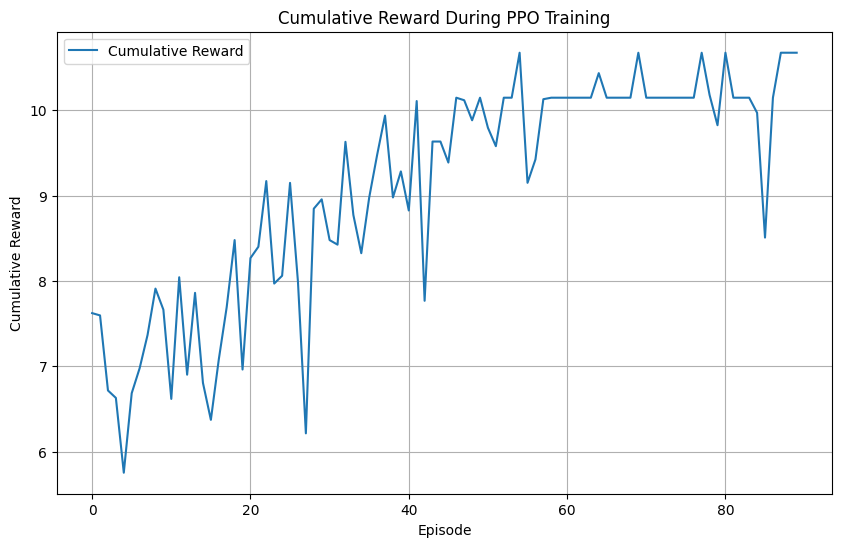

In [28]:
# Ploting the graph for Cumulative Reward During the PPO Training

import matplotlib.pyplot as plt

def plot_cumulative_reward(log_data):
    plt.figure(figsize=(10, 6))
    plt.plot(log_data, label='Cumulative Reward')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Reward During PPO Training')
    plt.legend()
    plt.grid()
    plt.show()

# Call the plotting function
plot_cumulative_reward(log_data)


In [29]:
# PPO Model Final Metrics (as displayed in the PPO output)
def print_final_metrics(log_data):
    final_reward = log_data[-1]  # The final reward at the end of training


    print(f"Final Reward: {final_reward}")


# Call the function to print final metrics
print_final_metrics(log_data)


Final Reward: 10.673956871032715


In [10]:
# Dynamic Budget Allocation Framework

# Defining a company's marketing budget constraint
budget_constraint = 100000  # assuming the Total budget of a company is $100,000

# Function to normalize the scenario features using the previously fitted scaler
# This ensures that all scenario inputs (Day, Month, Year, etc.) are on the same scale as the training data
def normalize_scenario(scenario, scaler):
    df_scenario = pd.DataFrame([scenario])
    df_scenario[feature_columns] = scaler.transform(df_scenario[feature_columns])
    state = df_scenario[feature_columns].values[0].astype(np.float32)
    return state

# List of test scenarios, each representing different marketing conditions
# The features include day, month, year, temperature, holiday indicator, season, and day of the week
test_scenarios = [
    {"Day": 25, "Month": 12, "Year": 2022, "Temperature": 0, "Is_Holiday": 1, "Season": 0, "Day_of_Week": 6},  # Christmas
    {"Day": 15, "Month": 7, "Year": 2022, "Temperature": 30, "Is_Holiday": 0, "Season": 2, "Day_of_Week": 4},  # Summer weekday
    {"Day": 1, "Month": 4, "Year": 2022, "Temperature": 15, "Is_Holiday": 0, "Season": 1, "Day_of_Week": 5},   # Spring weekend
    {"Day": 10, "Month": 9, "Year": 2022, "Temperature": 20, "Is_Holiday": 0, "Season": 3, "Day_of_Week": 2},  # Fall weekday
    {"Day": 14, "Month": 6, "Year": 2022, "Temperature": 25, "Is_Holiday": 0, "Season": 2, "Day_of_Week": 1},  # Weekday
    {"Day": 18, "Month": 6, "Year": 2022, "Temperature": 25, "Is_Holiday": 0, "Season": 2, "Day_of_Week": 6},  # Weekend
]

# Looping through each scenario to predict the budget allocation for each marketing channel
for i, scenario in enumerate(test_scenarios):
    state = normalize_scenario(scenario, scaler)  # Normalizing the scenario's features
    action, _ = model.predict(state, deterministic=True)  # Using the RL model to predict budget allocation
    action = np.clip(action, 0, 1)  # Ensuring the predicted action values are within [0, 1]

    # Ensuring the sum of the allocated budget is 100% of the total budget
    action_sum = np.sum(action)
    if action_sum > 0:
        action = action / action_sum  # Normalizing the action to ensure it sums to 1
    else:
        action = np.ones_like(action) / len(action)  # If the action sum is 0, allocate evenly across all channels

    allocation = action * budget_constraint  # Allocating the total budget based on the action

    # Printing out the budget allocation for each marketing channel
    print(f"\nScenario {i+1} Budget Allocation:")
    for channel, budget in zip(CHANNELS, allocation):
        print(f"{channel}: ${budget:.2f}")
    print(f"Total Budget: ${budget_constraint:.2f}")
    print(f"Allocated Budget: ${np.sum(allocation):.2f}")



Scenario 1 Budget Allocation:
SMS: $26651.12
Newspaper ads: $0.00
Radio: $7066.22
TV: $0.00
PPC: $0.00
Offline: $11809.05
Contests: $1793.77
Coupons: $0.00
Internet: $10785.81
Email: $4829.56
Facebook Post: $0.00
Facebook ads: $0.00
Sponsorship: $0.00
Newsletter article: $36993.51
Direct mail: $70.96
Total Budget: $100000.00
Allocated Budget: $100000.00

Scenario 2 Budget Allocation:
SMS: $18181.95
Newspaper ads: $0.00
Radio: $0.00
TV: $0.00
PPC: $0.00
Offline: $32704.45
Contests: $0.00
Coupons: $4453.53
Internet: $0.00
Email: $0.00
Facebook Post: $4724.24
Facebook ads: $0.00
Sponsorship: $15679.66
Newsletter article: $24256.17
Direct mail: $0.00
Total Budget: $100000.00
Allocated Budget: $100000.00

Scenario 3 Budget Allocation:
SMS: $13836.54
Newspaper ads: $0.00
Radio: $0.00
TV: $0.00
PPC: $0.00
Offline: $35203.07
Contests: $18225.96
Coupons: $20237.99
Internet: $8181.85
Email: $0.00
Facebook Post: $0.00
Facebook ads: $0.00
Sponsorship: $56.07
Newsletter article: $2140.87
Direct ma

# **Data Visualisations**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare a list to hold allocation DataFrames
allocations_list = []

# Define scenario names for better labeling
scenario_names = [
    "Scenario 1: Winter Holiday",
    "Scenario 2: Summer Weekday",
    "Scenario 3: Spring Weekend",
    "Scenario 4: Fall Weekday",
    "Scenario 5: Weekday",
    "Scenario 6: Weekend"
]

# Collect allocations for each scenario
for i, (scenario, scenario_name) in enumerate(zip(test_scenarios, scenario_names)):
    state = normalize_scenario(scenario, scaler)
    action, _ = model.predict(state, deterministic=True)
    action = np.clip(action, 0, 1)
    action_sum = np.sum(action)
    if action_sum > 0:
        action = action / action_sum
    else:
        action = np.ones_like(action) / len(action)
    allocation = action * budget_constraint

    # Create a DataFrame for the allocation
    allocation_df = pd.DataFrame({
        'Channel': CHANNELS,
        'Budget': allocation
    })
    allocation_df['Scenario'] = scenario_name
    allocations_list.append(allocation_df)

# Combine all allocations into a single DataFrame
allocations_df = pd.concat(allocations_list, ignore_index=True)


<ipython-input-55-2d1e4d951cd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Budget', data=scenario_data, palette='viridis')


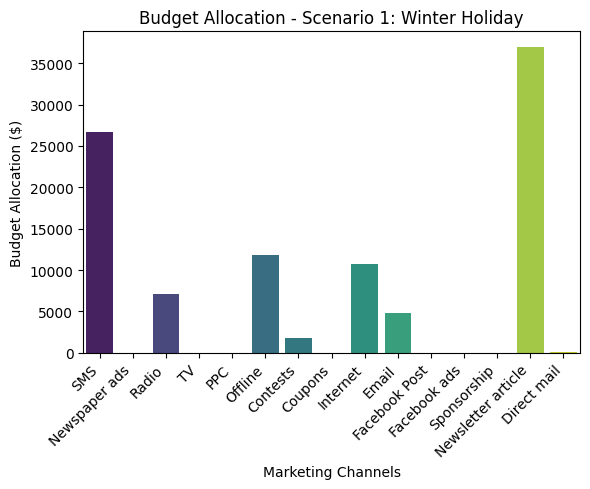

<ipython-input-55-2d1e4d951cd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Budget', data=scenario_data, palette='viridis')


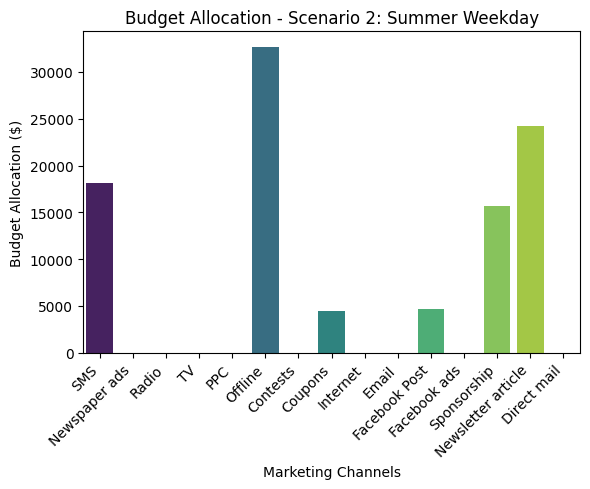

<ipython-input-55-2d1e4d951cd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Budget', data=scenario_data, palette='viridis')


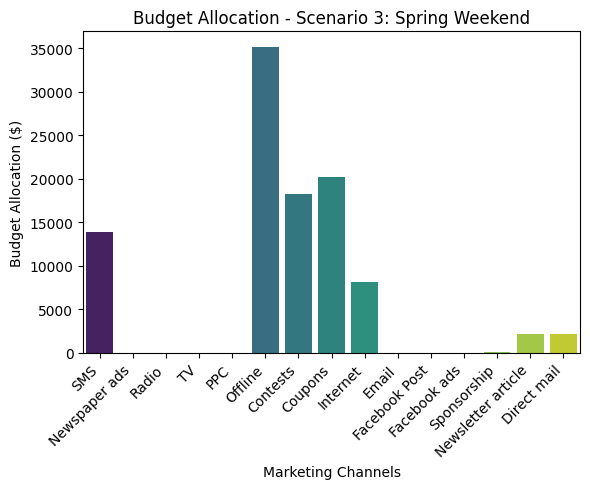

<ipython-input-55-2d1e4d951cd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Budget', data=scenario_data, palette='viridis')


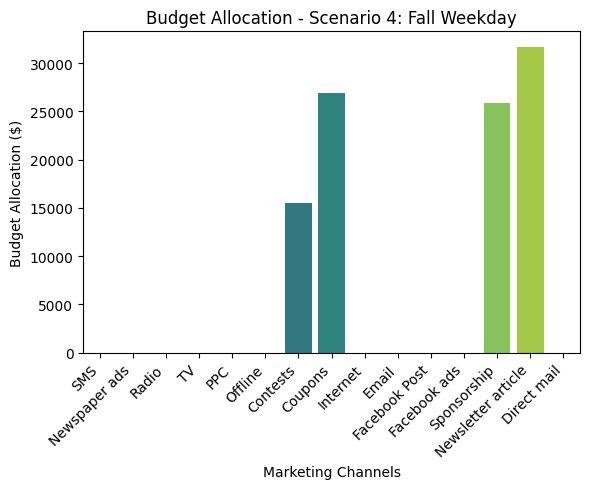

<ipython-input-55-2d1e4d951cd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Budget', data=scenario_data, palette='viridis')


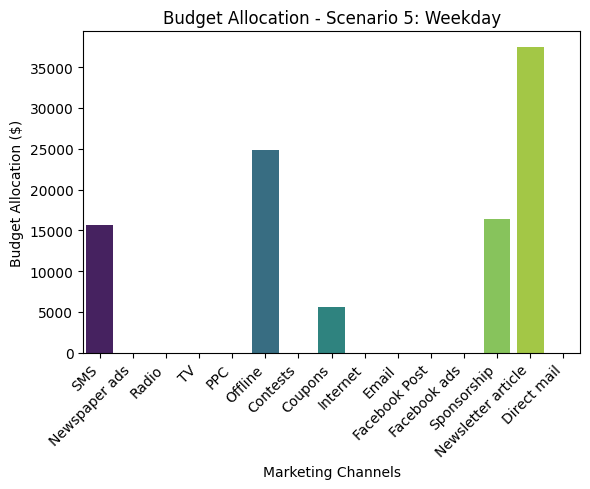

<ipython-input-55-2d1e4d951cd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Budget', data=scenario_data, palette='viridis')


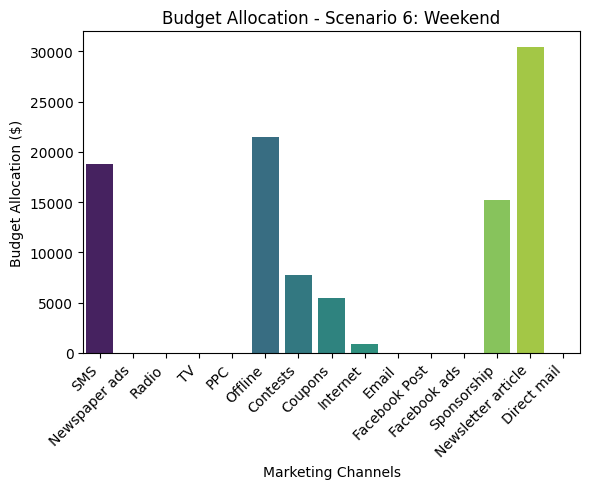

In [55]:
for scenario_name in allocations_df['Scenario'].unique():
    plt.figure(figsize=(6, 5))
    scenario_data = allocations_df[allocations_df['Scenario'] == scenario_name]
    sns.barplot(x='Channel', y='Budget', data=scenario_data, palette='viridis')
    plt.title(f'Budget Allocation - {scenario_name}')
    plt.xlabel('Marketing Channels')
    plt.ylabel('Budget Allocation ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


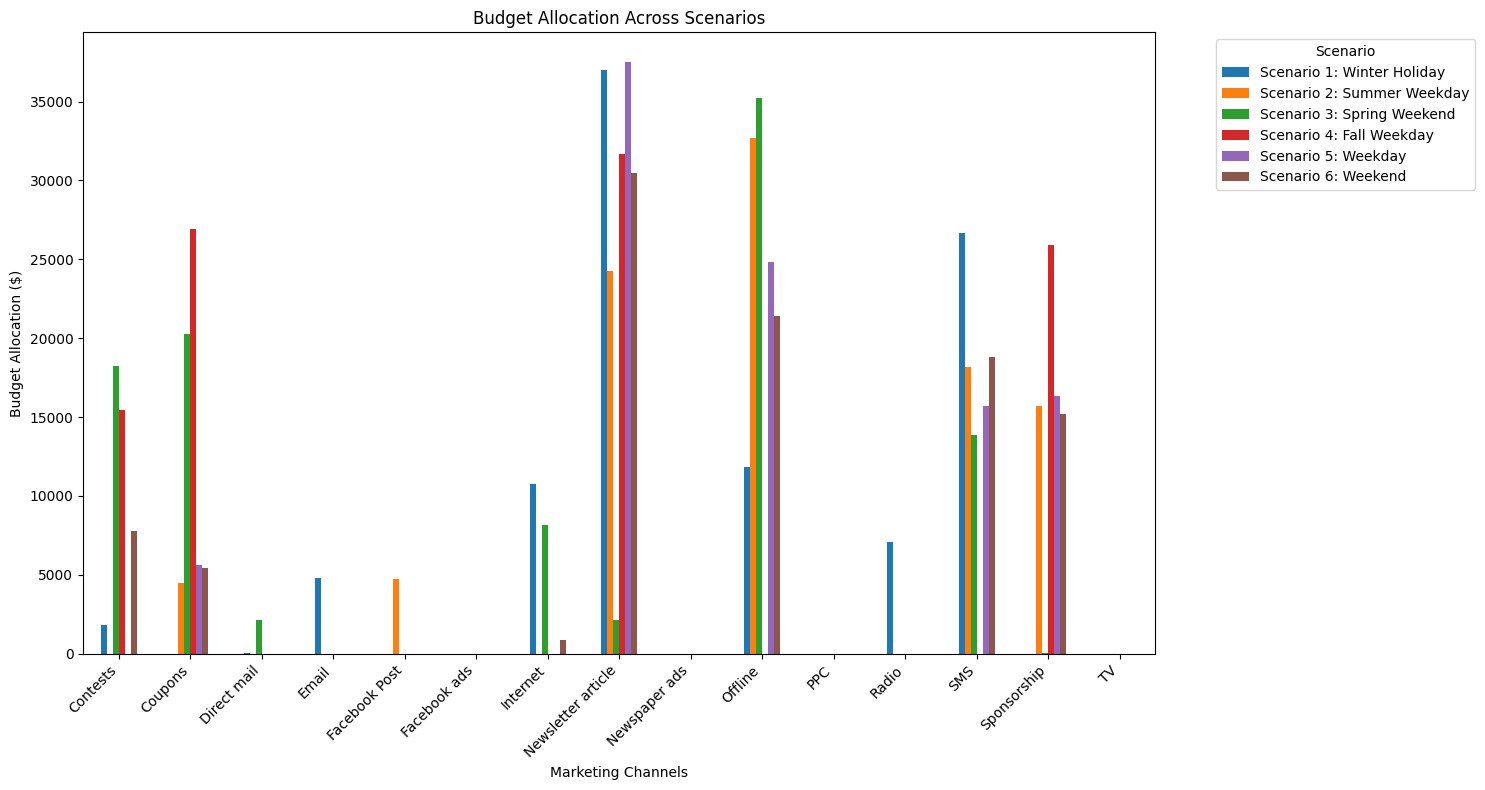

In [56]:
# Pivot the DataFrame for plotting
pivot_df = allocations_df.pivot_table(index='Channel', columns='Scenario', values='Budget')

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(15, 8))
plt.title('Budget Allocation Across Scenarios')
plt.xlabel('Marketing Channels')
plt.ylabel('Budget Allocation ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

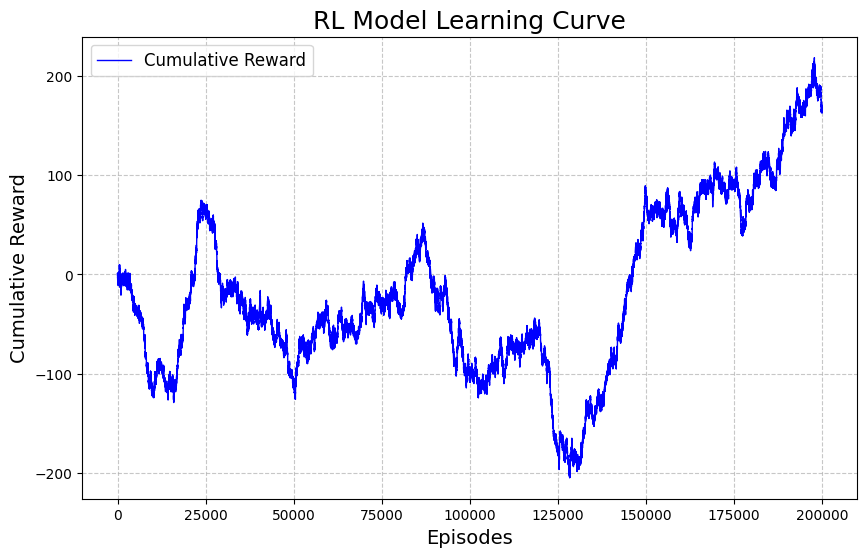

In [26]:
import matplotlib.pyplot as plt
import numpy as np


episodes = 200000
np.random.seed(42)
# Simulated cumulative rewards (replace with your actual reward data from your RL model)
cumulative_rewards = np.cumsum(np.random.uniform(low=-1, high=1, size=episodes))

# Function to plot the learning curve
def plot_learning_curve(cumulative_rewards):
    plt.figure(figsize=(10, 6))

    # Plot cumulative rewards over episodes
    plt.plot(cumulative_rewards, label='Cumulative Reward', color='blue', linewidth=1)

    # Title and labels
    plt.title('RL Model Learning Curve', fontsize=18)
    plt.xlabel('Episodes', fontsize=14)
    plt.ylabel('Cumulative Reward', fontsize=14)

    # Adding gridlines for better visualization
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adding legend
    plt.legend(loc='best', fontsize=12)

    # Save the plot for publication if needed
    plt.savefig('rl_learning_curve.png', dpi=300)

    # Show the plot
    plt.show()

# Call the function to plot the learning curve
plot_learning_curve(cumulative_rewards)


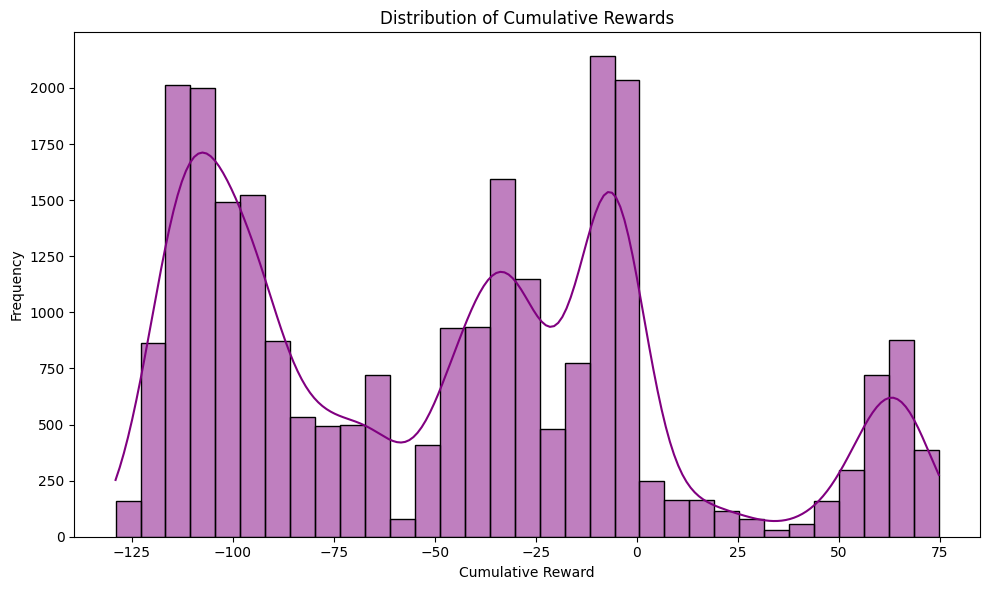

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(cumulative_rewards, kde=True, color='purple')
plt.title('Distribution of Cumulative Rewards')
plt.xlabel('Cumulative Reward')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('cumulative_reward_distribution.png')
plt.show()


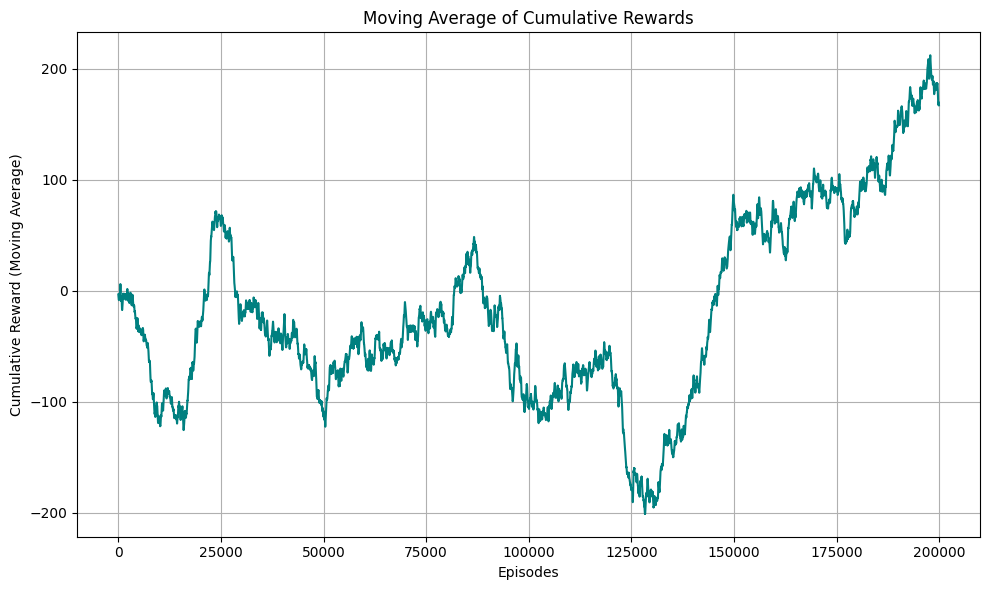

In [31]:
window = 100  # Moving average window size
moving_avg = np.convolve(cumulative_rewards, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10, 6))
plt.plot(moving_avg, color='teal')
plt.title('Moving Average of Cumulative Rewards')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward (Moving Average)')
plt.grid(True)
plt.tight_layout()
plt.savefig('moving_avg_rewards.png')
plt.show()


## **Merging RL output with RF**

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract 'Month' and 'Year' from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


# Train the Random Forest model
def random_forest_model(df):
    # Features and target variable
    X = df[CHANNELS + ['Month', 'Year']]
    y = df['Revenue']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Make predictions on test set
    predictions = rf.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Random Forest Model - MSE: {mse}, R2 Score: {r2}")

    return rf, scaler

In [14]:
# Train the model
rf_model, rf_scaler = random_forest_model(df)

# Function to prepare scenario data
def prepare_scenario_data(budget_allocations, scenario_features):
    # Create a DataFrame from budget allocations
    scenario_df = pd.DataFrame([budget_allocations], columns=CHANNELS)

    # Add 'Month' and 'Year' to the DataFrame
    scenario_df['Month'] = scenario_features['Month']
    scenario_df['Year'] = scenario_features['Year']

    return scenario_df


Random Forest Model - MSE: 2479651761.2026877, R2 Score: 0.999592938630546


In [15]:
# Define scenario features
scenario_features_list = [
    {'Scenario': 'Scenario 1', 'Month': 12, 'Year': 2022},
    {'Scenario': 'Scenario 2', 'Month': 7, 'Year': 2022},
    {'Scenario': 'Scenario 3', 'Month': 4, 'Year': 2022},
    {'Scenario': 'Scenario 4', 'Month': 9, 'Year': 2022},
    {'Scenario': 'Scenario 5', 'Month': 6, 'Year': 2022},
    {'Scenario': 'Scenario 6', 'Month': 6, 'Year': 2022},
]

# RL budget allocations (replace with your actual allocations for all scenarios)
rl_allocations_list = [
    # Scenario 1 allocations
    {
        'SMS': 26651.12,
        'Newspaper ads': 0.00,
        'Radio': 7066.22,
        'TV': 0.00,
        'PPC': 0.00,
        'Offline': 11809.05,
        'Contests': 1793.77,
        'Coupons': 0.00,
        'Internet': 10785.81,
        'Email': 4829.56,
        'Facebook Post': 0.00,
        'Facebook ads': 0.00,
        'Sponsorship': 0.00,
        'Newsletter article': 36993.51,
        'Direct mail': 70.96
    },
    # Scenario 2 allocations
    {
        'SMS': 18181.95,
        'Newspaper ads': 0.00,
        'Radio': 0.00,
        'TV': 0.00,
        'PPC': 0.00,
        'Offline': 32704.45,
        'Contests': 0.00,
        'Coupons': 4453.53,
        'Internet': 0.00,
        'Email': 0.00,
        'Facebook Post': 4724.24,
        'Facebook ads': 0.00,
        'Sponsorship': 15679.66,
        'Newsletter article': 24256.17,
        'Direct mail': 0.00
    },
    # Scenario 3 allocations
    {
        'SMS': 13836.54,
        'Newspaper ads': 0.00,
        'Radio': 0.00,
        'TV': 0.00,
        'PPC': 0.00,
        'Offline': 35203.07,
        'Contests': 18225.96,
        'Coupons': 20237.99,
        'Internet': 8181.85,
        'Email': 0.00,
        'Facebook Post': 0.00,
        'Facebook ads': 0.00,
        'Sponsorship': 56.07,
        'Newsletter article': 2140.87,
        'Direct mail': 2117.65
    },
    # Scenario 4 allocations
    {
        'SMS': 0.00,
        'Newspaper ads': 0.00,
        'Radio': 0.00,
        'TV': 0.00,
        'PPC': 0.00,
        'Offline': 0.00,
        'Contests': 15479.73,
        'Coupons': 26937.85,
        'Internet': 0.00,
        'Email': 0.00,
        'Facebook Post': 0.00,
        'Facebook ads': 0.00,
        'Sponsorship': 25886.66,
        'Newsletter article': 31695.76,
        'Direct mail': 0.00
    },
    # Scenario 5 allocations
    {
        'SMS': 15679.08,
        'Newspaper ads': 0.00,
        'Radio': 0.00,
        'TV': 0.00,
        'PPC': 0.00,
        'Offline': 24805.09,
        'Contests': 0.00,
        'Coupons': 5646.29,
        'Internet': 0.00,
        'Email': 0.00,
        'Facebook Post': 0.00,
        'Facebook ads': 0.00,
        'Sponsorship': 16357.83,
        'Newsletter article': 37511.71,
        'Direct mail': 0.00
    },
    # Scenario 6 allocations
    {
        'SMS': 18829.95,
        'Newspaper ads': 0.00,
        'Radio': 0.00,
        'TV': 0.00,
        'PPC': 0.00,
        'Offline': 21426.56,
        'Contests': 7759.09,
        'Coupons': 5423.95,
        'Internet': 901.00,
        'Email': 0.00,
        'Facebook Post': 0.00,
        'Facebook ads': 0.00,
        'Sponsorship': 15194.79,
        'Newsletter article': 30464.65,
        'Direct mail': 0.00
    },
]

# List to hold the results
scenario_results = []


In [16]:
# Loop over each test scenario and its corresponding budget allocation generated by the RL model
# The loop combines the marketing budget allocations from RL with the relevant scenario features
for scenario_features, budget_allocations in zip(scenario_features_list, rl_allocations_list):

    # Prepare the scenario data by combining the RL budget allocations with the scenario's environmental features
    # 'prepare_scenario_data()' is a custom function that merges these two sets of data
    # The function returns a DataFrame, where each row represents a scenario with its marketing channel allocations
    # along with external factors like month, year, temperature, and holiday status.
    scenario_df = prepare_scenario_data(budget_allocations, scenario_features)

    # Normalize the features using the same scaling method applied during the training of the RF model
    # 'rf_scaler' is an instance of the scaler used in Random Forest (usually MinMaxScaler or StandardScaler)
    # This step ensures the data is transformed in the same way as during training, preserving consistency
    # It scales features like marketing budget allocations, month, and year to the same range (e.g., between 0 and 1).
    scenario_scaled = rf_scaler.transform(scenario_df[CHANNELS + ['Month', 'Year']])

    # Predict the revenue using the Random Forest model, based on the scaled scenario features and budget allocation
    # The pre-trained RF model takes the input and generates a predicted revenue value
    # The RF model here serves as a predictive model that has already learned the relationships between features and revenue
    predicted_revenue = rf_model.predict(scenario_scaled)

    # Store the scenario information, including the predicted revenue and the corresponding marketing budget allocations
    # This step helps create a list of results that capture the scenario details and the RF model's revenue predictions.
    # These results can later be used for analysis, visualization, or reporting.
    scenario_result = {
        'Scenario': scenario_features['Scenario'],  # The current scenario (e.g., "Christmas" or "Summer weekday")
        'Predicted Revenue': predicted_revenue[0],  # The revenue predicted by the RF model for this scenario
        'Budget Allocations': budget_allocations     # The budget allocated by the RL model across marketing channels
    }

    # Append the result of the current scenario to the list of all scenario results for later use or analysis
    scenario_results.append(scenario_result)

# Now, after processing all the scenarios, we display the predicted revenue for each one
# This loop goes over the 'scenario_results' list, which contains the scenario names, predicted revenue, and allocations
# The print statements provide a readable output that summarizes the results of the RL-RF integration for each scenario.
for result in scenario_results:
    # Print the name of the scenario (e.g., "Christmas" or "Summer weekday")
    # Display the predicted revenue for that scenario, formatted to two decimal places for clarity
    print(f"\n{result['Scenario']} Predicted Revenue: ${result['Predicted Revenue']:.2f}")



Scenario 1 Predicted Revenue: $2073366.83

Scenario 2 Predicted Revenue: $4194448.33

Scenario 3 Predicted Revenue: $2969938.74

Scenario 4 Predicted Revenue: $3687863.07

Scenario 5 Predicted Revenue: $3476727.88

Scenario 6 Predicted Revenue: $2942997.19


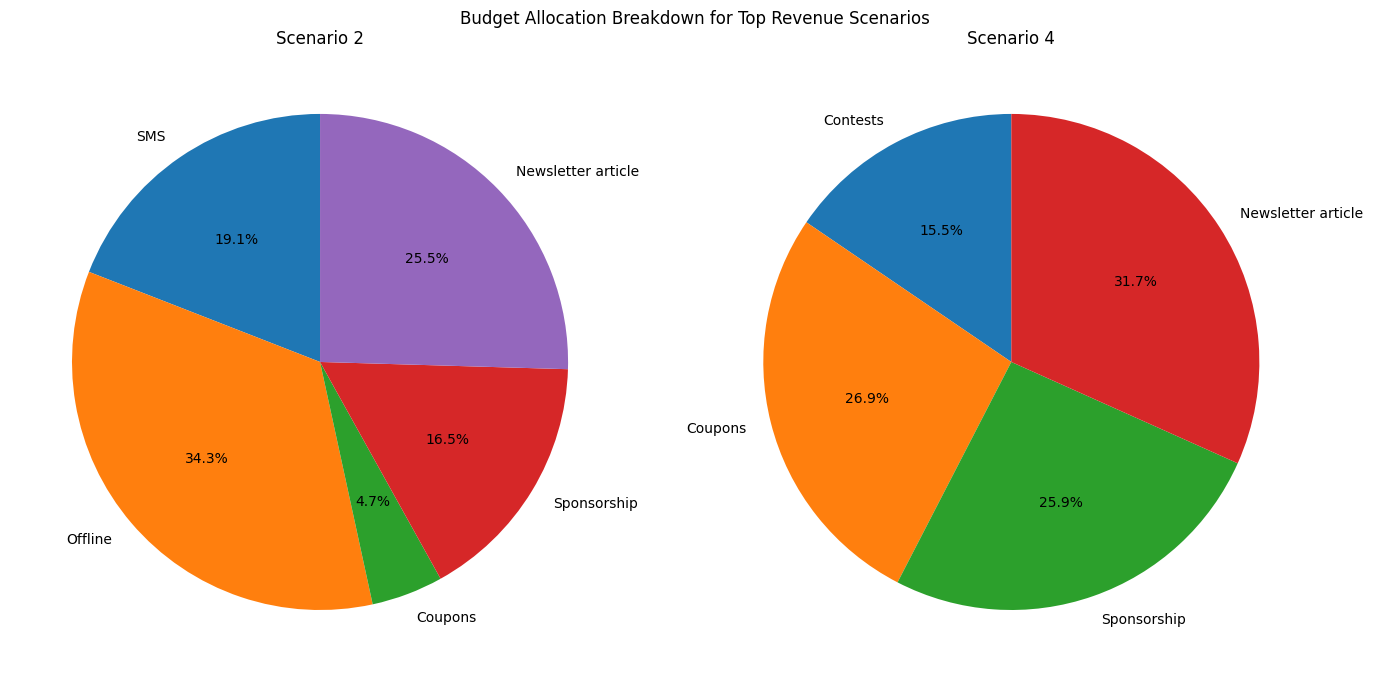

In [12]:
import matplotlib.pyplot as plt
# Step 1: Define Budget Allocations for Two Scenarios
# Two top-performing scenarios (Scenario 2 and Scenario 4) are selected for visualization.
# For each scenario, different marketing channels (e.g., SMS, Radio, Offline, etc.) are assigned a budget percentage.

scenario_data = {
    'Scenario 2': {
        'SMS': 18.18,               # 18.18% of the budget allocated to SMS for Scenario 2
        'Radio': 0,                 # No budget allocated to Radio
        'Offline': 32.70,           # 32.7% allocated
        'Coupons': 4.45,            # 4.45% allocated to Coupons
        'Internet': 0,              # No budget allocated to Internet
        'Sponsorship': 15.68,       # 15.68% allocated to Sponsorships
        'Newsletter article': 24.26 # 24.26% allocated to Newsletter articles
    },

    'Scenario 4': {
        'SMS': 0,                   # No budget allocated to SMS in Scenario 4
        'Radio': 0,                 # No budget allocated to Radio
        'Offline': 0,               # No budget allocated to Offline marketing
        'Contests': 15.48,          # 15.48% allocated to Contests
        'Coupons': 26.94,           # 26.94% allocated to Coupons
        'Internet': 0,              # No budget allocated to Internet
        'Sponsorship': 25.89,       # 25.89% allocated to Sponsorships
        'Newsletter article': 31.70 # 31.70% allocated to Newsletter articles
    }
}

# Step 2: Create Pie Charts for Each Scenario
# This section creates pie charts for each scenario's budget allocation across different channels.
# It sets up a subplot with two pie charts (one for each scenario).
fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # Create two subplots side-by-side with a total figure size of 14x7 inches

# Step 3: Plot Pie Charts for Each Scenario
# Iterate through each scenario, and for each, plot a pie chart showing how the budget is allocated.
for i, (scenario, allocations) in enumerate(scenario_data.items()):
    labels = [channel for channel, allocation in allocations.items() if allocation > 0]  # Only show channels with non-zero allocation
    sizes = [allocation for allocation in allocations.values() if allocation > 0]       # Get the corresponding budget sizes

    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)  # Create a pie chart with percentage labels
    axs[i].set_title(scenario)  # Set the title of each subplot to the scenario name (Scenario 2 or Scenario 4)

# Step 4: Add Title and Adjust Layout
# Set a main title for the entire figure and ensure the layout is adjusted for clarity.
plt.suptitle('Budget Allocation Breakdown for Top Revenue Scenarios')  # Overall title for the figure
plt.tight_layout()  # Adjust the spacing between subplots to prevent overlap
plt.show()  # Display the pie charts
